# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

import datetime
# BDay is business day, not birthday.  Used to calculate prior business day for closing market prices.
from pandas.tseries.offsets import BDay

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Make list of url's to check for any exception erros.  Copied from class instruction demo exercise, with minor edits.
crypto_url_list = [btc_url, eth_url]

for url in crypto_url_list:
    try:
        response = requests.get(url)

        # Check Status Codes
        if response.status_code == 200:
            print(response.json())
        else:
            print(f"The url: {url} is invalid.\nResponse code: {response.status_code}")

    except Exception as error:
        # If an exception occurs in the try portion, the code in this branch will be executed.
        print(f"Unable to connect to the server at url: {url}.\nError:\n{error}")
    finally:
        # Everything in finally will be executed regardless of try/except
        print(f"Parsed url: {url}\n")

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19076762, 'total_supply': 19076762, 'max_supply': 21000000, 'quotes': {'USD': {'price': 21224.0, 'volume_24h': 19025778103, 'market_cap': 404043073115, 'percentage_change_1h': 0.593419975800762, 'percentage_change_24h': -0.266957595151171, 'percentage_change_7d': 3.66713364768662, 'percent_change_1h': 0.593419975800762, 'percent_change_24h': -0.266957595151171, 'percent_change_7d': 3.66713364768662}}, 'last_updated': 1656164045}}, 'metadata': {'timestamp': 1656164045, 'num_cryptocurrencies': 3116, 'error': None}}
Parsed url: https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 121298768, 'total_supply': 121298768, 'max_supply': 0, 'quotes': {'USD': {'price': 1197.93, 'volume_24h': 13029704545, 'market_cap': 145104106052, 'percentage_c

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19076762,
            "id": 1,
            "last_updated": 1656164045,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 404043073115,
                    "percent_change_1h": 0.593419975800762,
                    "percent_change_24h": -0.266957595151171,
                    "percent_change_7d": 3.66713364768662,
                    "percentage_change_1h": 0.593419975800762,
                    "percentage_change_24h": -0.266957595151171,
                    "percentage_change_7d": 3.66713364768662,
                    "price": 21224.0,
                    "volume_24h": 19025778103
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19076762,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 121298768,
            "id": 1027,
            "last_updated": 1656164084,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 145104106052,
                    "percent_change_1h": -0.0460067881626383,
                    "percent_change_24h": -1.53976435026306,
                    "percent_change_7d": 10.122493563016,
                    "percentage_change_1h": -0.0460067881626383,
                    "percentage_change_24h": -1.53976435026306,
                    "percentage_change_7d": 10.122493563016,
                    "price": 1197.93,
                    "volume_24h": 13029704545
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 121298768,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current price for Bitcoin is ${btc_price:0.2f}")


The current price for Bitcoin is $21224.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price for Ethereum is ${eth_price:0.2f}")


The current price for Ethereum is $1197.93


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your Bitcoin holdings is ${btc_value:0.2f}")


The current value of your Bitcoin holdings is $25468.80


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of your Ethereum holdings is ${eth_value:0.2f}")


The current value of your Ethereum holdings is $6349.03


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Your total cryptocurrency current wallet balance is ${total_crypto_wallet:0.2f}")


Your total cryptocurrency current wallet balance is $31817.83


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


<class 'str'>
<class 'str'>


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Get a formatted date for the prior business day.  Used in API calls for obtaining prices from last market close.

today = datetime.datetime.today()
# BDay is business day, not birthday.  Used to calculate prior business day for closing market prices.
prior_business_day = today - BDay(1)
prior_business_day_str = prior_business_day.strftime ('%Y-%m-%d') # formats the date to YYYY-MM-DD and stores as a string
prior_business_day_str

'2022-06-24'

In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp(prior_business_day_str, tz="America/New_York").isoformat()
end_date = pd.Timestamp(prior_business_day_str, tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([SPY,AGG], axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
portfolio_df.head()


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-06-24 04:00:00+00:00  381.43  390.09  381.365  390.08  97628636   

                                                     AGG                   \
                          trade_count       vwap    open    high      low   
timestamp                                                                   
2022-06-24 04:00:00+00:00      628275  386.72431  101.11  101.47  100.995   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-24 04:00:00+00:00  101.05  7379452       22965  101.093993

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df["AGG"]["close"])

# Print the AGG closing price
print(f"The AGG closing price is ${agg_close_price:0.2f}")


The AGG closing price is $101.05


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df["SPY"]["close"])

# Print the SPY closing price
print(f"The SPY closing price is ${spy_close_price:0.2f}")


The SPY closing price is $390.08


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value:0.2f}")


The current value of the bond portfolio is $20210.00


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value:0.2f}")


The current value of the stock portfolio is $42908.80


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:0.2f}")


The current balance of the stock and bond portion of the portfolio is $63118.80


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print the total value of the member's entire savings portfolio
print(f"The total value of your entire savings portfolio is ${total_portfolio:0.2f}")


The total value of your entire savings portfolio is $94936.63


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[31817.828999999998, 63118.799999999996]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,31817.829
stock/bond,63118.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Breakdown of Total Portfolio Value'}, ylabel='amount'>

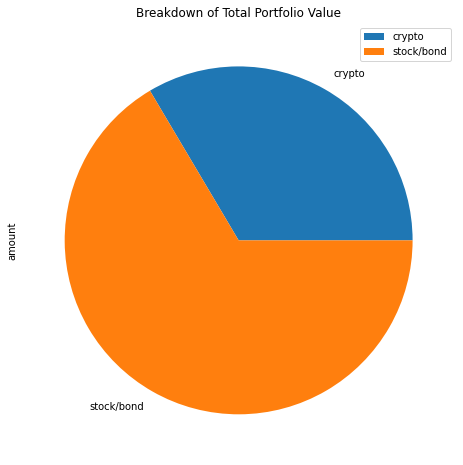

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', figsize=(8, 8), title="Breakdown of Total Portfolio Value")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! You have more than enough money saved to cover emergencies, with ${total_portfolio - emergency_fund_value:0.2f} to spare.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have just enough money saved to cover emergencies.")
else:
    print(f"Almost there! You'll need to save an additional ${emergency_fund_value - total_portfolio:0.2f} to fully fund your emergency fund.")


Congratulations! You have more than enough money saved to cover emergencies, with $58936.63 to spare.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [47]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

print(prior_business_day_str) # from Financial Planner for Emergencies coding

three_years_ago = prior_business_day - datetime.timedelta(days=365*3)  # does not reflect leap years, but that's ok for our purposes 
three_years_ago_str = three_years_ago.strftime ('%Y-%m-%d') # formats the date to YYYY-MM-DD and stores as a string
print(three_years_ago_str)

start_date_2 = pd.Timestamp(three_years_ago_str, tz="America/New_York").isoformat()
end_date_2 = pd.Timestamp(prior_business_day_str, tz="America/New_York").isoformat()

2022-06-24
2019-06-25


In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
portfolio_2_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_2,
    end=end_date_2).df

# Take only the "close" and "symbol" columns for the dataframe.
portfolio_2_df = portfolio_2_df[["close", "symbol"]]

# Reorganize the DataFrame
# Separate ticker data
SPY_2 = portfolio_2_df[portfolio_2_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG_2 = portfolio_2_df[portfolio_2_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_2_df = pd.concat([SPY_2,AGG_2], axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
portfolio_2_df


,SPY,AGG
,close,close
timestamp,,
2019-06-25 04:00:00+00:00,290.76,111.34
2019-06-26 04:00:00+00:00,290.47,111.09
2019-06-27 04:00:00+00:00,291.50,111.40
2019-06-28 04:00:00+00:00,293.00,111.35
2019-07-01 04:00:00+00:00,295.66,111.18
...,...,...
2022-06-17 04:00:00+00:00,365.86,100.34
2022-06-21 04:00:00+00:00,375.07,99.94


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_60_40 = MCSimulation(
    portfolio_data = portfolio_2_df,
    weights = [0.60, 0.40],
    num_simulation=500,
    num_trading_days=252*30)

# Review the simulation input data
MC_60_40.portfolio_data


SPY                  AGG             
                            close daily_return   close daily_return
timestamp                                                          
2019-06-25 04:00:00+00:00  290.76          NaN  111.34          NaN
2019-06-26 04:00:00+00:00  290.47    -0.000997  111.09    -0.002245
2019-06-27 04:00:00+00:00  291.50     0.003546  111.40     0.002791
2019-06-28 04:00:00+00:00  293.00     0.005146  111.35    -0.000449
2019-07-01 04:00:00+00:00  295.66     0.009078  111.18    -0.001527
...                           ...          ...     ...          ...
2022-06-17 04:00:00+00:00  365.86    -0.002155  100.34    -0.000100
2022-06-21 04:00:00+00:00  375.07     0.025174   99.94    -0.003986
2022-06-22 04:00:00+00:00  374.39    -0.001813  100.79     0.008505
2022-06-23 04:00:00+00:00  378.06     0.009803  101.21     0.004167
2022-06-24 04:00:00+00:00  390.08     0.031794  101.05    -0.001581

[757 rows x 4 columns]

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jasonbuckholt/Desktop/FinTech_Workspace/Challenges/Module_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004578,0.995521,1.005744,1.010444,0.984409,0.993851,1.008081,0.997345,0.998475,1.010726,...,0.995289,0.996933,0.993462,0.996897,0.996744,0.995379,1.006917,0.995438,1.004424,0.991256
2,1.004050,0.988999,1.026477,0.999610,0.989371,0.999898,1.003070,0.987421,1.018045,1.004754,...,0.991883,1.009169,1.007906,0.988424,1.003079,0.994273,1.011916,0.996193,0.988963,0.974405
3,1.015387,0.985353,1.038492,0.988242,0.994163,0.994437,1.005250,0.966039,1.030431,1.004486,...,0.997562,1.009421,1.011378,0.979993,0.996719,0.981813,0.998920,0.990411,0.993892,0.983452
4,1.021721,0.994812,1.042227,0.997531,0.991179,1.007868,1.010777,0.968502,1.050405,0.994676,...,0.990315,1.016014,1.024464,0.986783,1.014358,0.971548,1.000677,1.000243,0.984419,0.985087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.136555,13.660730,2.641169,2.202518,4.442553,4.296569,13.846669,1.064179,1.428341,2.944748,...,18.733678,24.170506,11.344193,1.707865,5.050285,8.014191,2.382842,14.854223,1.256228,8.539993
7557,6.126689,13.791302,2.644698,2.203414,4.424775,4.305329,13.836763,1.066074,1.435457,2.986200,...,18.333945,24.278044,11.329137,1.685255,5.135803,8.077145,2.443862,15.055943,1.262791,8.548448
7558,6.117065,13.577783,2.654324,2.213153,4.411246,4.256578,13.807165,1.083483,1.441686,3.026361,...,18.361350,23.965079,11.524838,1.657436,5.172910,7.971993,2.436311,15.015140,1.276023,8.597159
7559,6.041854,13.527974,2.665641,2.165845,4.442652,4.266337,13.893992,1.085630,1.426599,3.004442,...,18.248577,24.203086,11.445400,1.651440,5.273573,8.039397,2.406349,14.998247,1.274390,8.573483


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

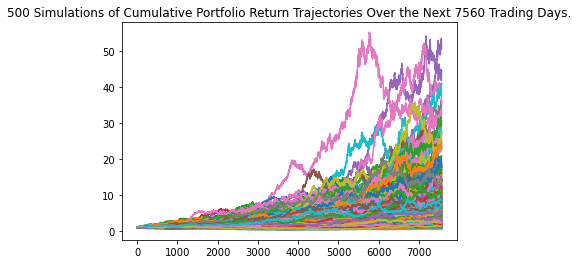

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_60_40_overlay_plot = MC_60_40.plot_simulation()
MC_60_40_overlay_plot

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

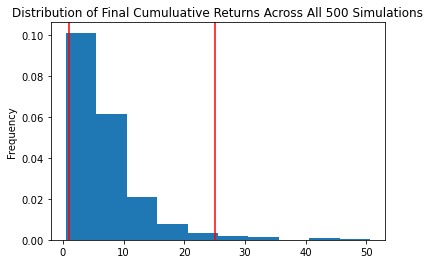

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_60_40_distribution_plot = MC_60_40.plot_distribution()
MC_60_40_distribution_plot


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_60_40_table = MC_60_40.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
MC_60_40_table

count           500.000000
mean              7.051171
std               6.421780
min               0.473754
25%               2.745240
50%               5.375865
75%               8.997304
max              50.643204
95% CI Lower      0.949612
95% CI Upper     25.149055
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stocks and bonds portfolio is ${total_stocks_bonds:0.0f}.")


The current value of the stocks and bonds portfolio is $63119.


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(total_stocks_bonds * MC_60_40_table[8], 2)
ci_upper_thirty_cumulative_return = round(total_stocks_bonds * MC_60_40_table[9], 2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of ${total_stocks_bonds:0.0f} in the stocks and bonds portfolio,"
      f" reallocated to be 60% in SPY and 40% in AGG, will accumulate in 30 years to be within the range of"
      f" ${ci_lower_thirty_cumulative_return:0.0f} and ${ci_upper_thirty_cumulative_return:0.0f}.")


There is a 95% chance that the current value of $63119 in the stocks and bonds portfolio, reallocated to be 60% in SPY and 40% in AGG, will accumulate in 30 years to be within the range of $59938 and $1587378.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_80_20 = MCSimulation(
    portfolio_data = portfolio_2_df,
    weights = [0.80, 0.20],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
MC_80_20.portfolio_data


SPY                  AGG             
                            close daily_return   close daily_return
timestamp                                                          
2019-06-25 04:00:00+00:00  290.76          NaN  111.34          NaN
2019-06-26 04:00:00+00:00  290.47    -0.000997  111.09    -0.002245
2019-06-27 04:00:00+00:00  291.50     0.003546  111.40     0.002791
2019-06-28 04:00:00+00:00  293.00     0.005146  111.35    -0.000449
2019-07-01 04:00:00+00:00  295.66     0.009078  111.18    -0.001527
...                           ...          ...     ...          ...
2022-06-17 04:00:00+00:00  365.86    -0.002155  100.34    -0.000100
2022-06-21 04:00:00+00:00  375.07     0.025174   99.94    -0.003986
2022-06-22 04:00:00+00:00  374.39    -0.001813  100.79     0.008505
2022-06-23 04:00:00+00:00  378.06     0.009803  101.21     0.004167
2022-06-24 04:00:00+00:00  390.08     0.031794  101.05    -0.001581

[757 rows x 4 columns]

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80_20.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jasonbuckholt/Desktop/FinTech_Workspace/Challenges/Module_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008730,0.992868,0.995187,0.983316,0.991310,0.988214,1.018612,1.000430,0.999684,1.005992,...,1.001874,1.008629,0.994910,1.006340,0.996653,0.988837,0.988108,0.992472,0.990052,1.015990
2,0.991964,0.961975,0.988923,0.966320,1.023627,0.995529,1.008742,1.000750,0.990192,1.015230,...,0.994380,1.000409,1.004932,1.013662,0.975263,0.989782,1.008396,0.987678,1.001051,1.017827
3,1.020740,0.970175,0.992343,0.950886,1.009799,0.982189,1.019442,1.016235,0.977132,1.020661,...,0.986069,0.987419,1.003152,1.003817,0.970345,1.003930,0.997483,0.989490,0.989198,1.014287
4,1.010498,0.961112,0.999267,0.941043,0.992037,0.998901,1.031591,1.027553,0.985103,1.015064,...,0.962143,0.989621,1.024462,1.002527,0.964649,1.019638,0.985003,0.988533,1.000129,1.014004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.626952,2.042408,1.321948,1.566619,1.823163,2.597735,1.398263,4.089469,3.711267,4.926508,...,0.783121,3.032039,2.354483,2.380653,0.522299,2.282498,1.538037,1.056973,3.301516,4.607758
2517,0.635098,2.036358,1.293135,1.549393,1.834762,2.632167,1.425726,4.107015,3.684767,4.979670,...,0.790446,2.997128,2.346035,2.422041,0.519676,2.202081,1.525892,1.039710,3.293098,4.624092
2518,0.649547,2.040728,1.294630,1.543372,1.832297,2.697546,1.440841,4.050514,3.675476,5.031818,...,0.792463,2.958692,2.356822,2.399736,0.524912,2.203749,1.529060,1.059045,3.289609,4.602785
2519,0.655761,2.021702,1.289840,1.549197,1.808980,2.732748,1.456770,4.150036,3.609923,5.043885,...,0.799435,2.891576,2.344051,2.392006,0.520297,2.189712,1.480490,1.051927,3.322855,4.602140


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

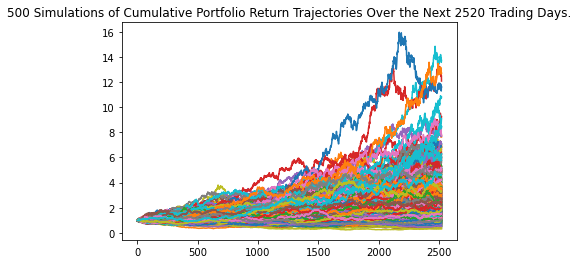

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_80_20_overlay_plot = MC_80_20.plot_simulation()
MC_80_20_overlay_plot


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

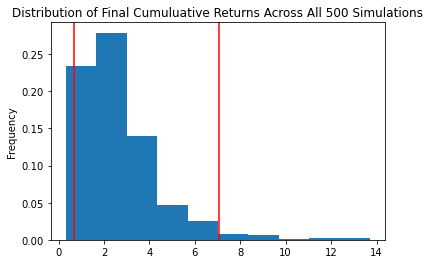

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_80_20_distribution_plot = MC_80_20.plot_distribution()
MC_80_20_distribution_plot


In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_80_20_table = MC_80_20.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_80_20_table

count           500.000000
mean              2.664039
std               1.804678
min               0.314711
25%               1.491816
50%               2.221206
75%               3.346549
max              13.718077
95% CI Lower      0.664197
95% CI Upper      7.077316
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stocks and bonds portfolio is ${total_stocks_bonds:0.0f}.")


The current value of the stocks and bonds portfolio is $63119.


In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(total_stocks_bonds * MC_80_20_table[8], 2)
ci_upper_ten_cumulative_return = round(total_stocks_bonds * MC_80_20_table[9], 2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of ${total_stocks_bonds:0.0f} in the stocks and bonds portfolio,"
      f" reallocated to be 80% in SPY and 20% in AGG, will accumulate in 10 years to be within the range of"
      f" ${ci_lower_ten_cumulative_return:0.0f} and ${ci_upper_ten_cumulative_return:0.0f}.")


There is a 95% chance that the current value of $63119 in the stocks and bonds portfolio, reallocated to be 80% in SPY and 20% in AGG, will accumulate in 10 years to be within the range of $41923 and $446712.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** I would not recommend that this member switch to an 80/20 stock/bond weighting strategy in the hopes of retiring in just 10 years.  First of all, based on their current investment allocation being in 65% bonds to just 35% equities, I'll assume that they are more risk averse than the average member.  Therefore, drastically increasing their investment strategy to 80% higher risk equities does not match their current risk aversion profile.  Secondly, even if they decide that an 80/20 split is worth the risk, the chances of that investment strategy paying off in 10 years is still quite low.  Only under the best case scenarios will this strategy accumulate their current investments to at least $500,000.  In fact, there's only a 2.5% chance that they'll have $450,000 or more in 10 years, which I would consider a bare minimum to retire on.  There's about a 50% chance that they'll only have between $100,000 and $200,000 in 10 years time, not nearly enough for retirement.  Best to invest more conservatively, at most 60% stocks, and plan on a retirement date much later than just 10 years from now.